In [1]:
import cv2
import numpy as np
import imutils
import easyocr
from matplotlib import pyplot as plt

In [21]:
img = cv2.imread('image2.jpg')

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

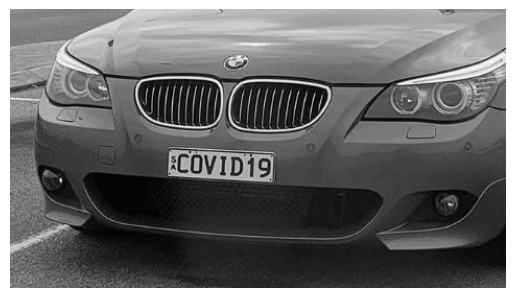

In [23]:
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

In [24]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)


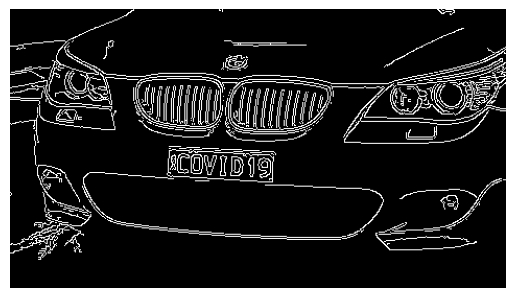

In [25]:
plt.imshow(edged, cmap='gray')
plt.axis('off')
plt.show()

In [26]:
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
location = None


In [27]:
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [28]:
mask = np.zeros(gray.shape, np.uint8)
cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)


In [29]:
x, y, w, h = cv2.boundingRect(location)

In [30]:
cropped_image = new_image[y:y+h, x:x+w]

In [31]:
cropped_gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)


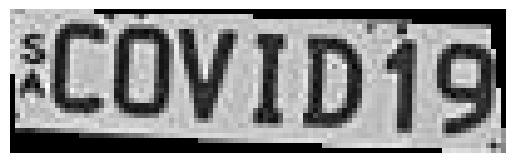

In [32]:
plt.imshow(cropped_gray, cmap='gray')
plt.axis('off')
plt.show()

In [33]:
!pip show easyocr

Name: easyocr
Version: 1.7.0
Summary: End-to-End Multi-Lingual Optical Character Recognition (OCR) Solution
Home-page: https://github.com/jaidedai/easyocr
Author: Rakpong Kittinaradorn
Author-email: r.kittinaradorn@gmail.com
License: Apache License 2.0
Location: e:\anaconda\lib\site-packages
Requires: ninja, numpy, opencv-python-headless, Pillow, pyclipper, python-bidi, PyYAML, scikit-image, scipy, Shapely, torch, torchvision
Required-by: 


In [34]:
target_height = 32
aspect_ratio = cropped_gray.shape[1] / cropped_gray.shape[0]
target_width = int(target_height * aspect_ratio)
resized_image = cv2.resize(cropped_gray, (target_width, target_height), interpolation=cv2.INTER_LINEAR)


In [35]:
reader = easyocr.Reader(['en'])
result = reader.readtext(resized_image)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [36]:
print(result)

[([[0, 0], [110, 0], [110, 32], [0, 32]], 'cOVIig', 0.09424550819851447)]


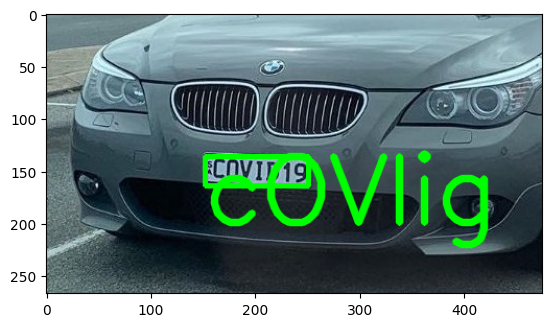

In [37]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(img,text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=3, color=(0,255,0), thickness=5, lineType=cv2.LINE_AA)
res=cv2.rectangle(img, tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))